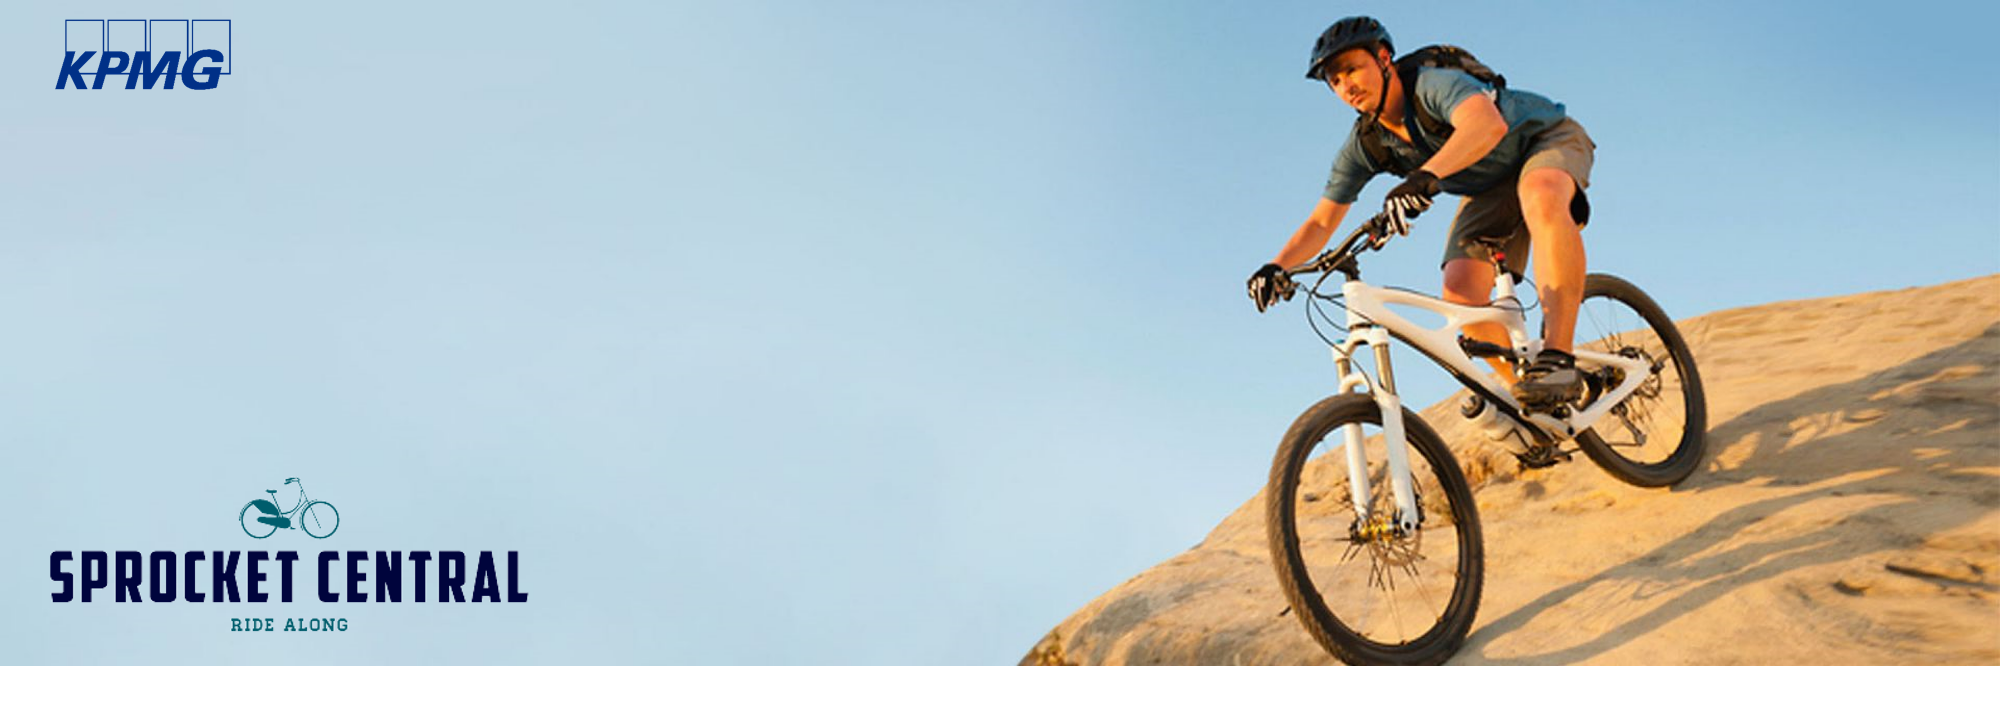

In [1]:
from IPython import display
display.Image('/Users/vamsi/Desktop/KPMG/image.png', width=1200)

## KPMG Internship Module_3

**Project Name: "Customers Recommendation Project"**  
**Client: "Sprocket Central Pty Ltd Company"**

**Project Brief:**  
Sprocket Central Pty Ltd, a medium-sized organization specializing in bikes and cycling accessories, has provided KPMG with three datasets: customer demographic, customer addresses, and transaction data for the past three months. The client needs help analyzing this data to optimize their marketing strategy for the new customer list.

**Module#01 Objective: Data Quality Assessment Report**  
In module #1, we cleaned and integrated the data.

**Module#02 Objective: Data Exploration**  
In module #02, we conducted a comprehensive data exploratory analysis, RFM analysis, and customer segmentation.   

**Module#03 Objective: Model buidling, training and testing**  
In module #03, the client provided an additional dataset called "New Customers List" comprising 1000 records of customers who haven't purchased any products. They need help identifying which customers to target with marketing campaigns based on this new dataset. We'll use a machine learning classification model trained on the old customer dataset, which includes RFM segmentations, to predict the most probable segment for each new customer. This approach will guide us in making informed decisions on which marketing campaigns to focus on.

# Table of Contents

- [1.0. Old Customers RFM Dataset Features Engineering](#old-customers-rfm-dataset-features-engineering)
    - [1.1. One-Hot Encoding](#one-hot-encoding)
    - [1.2. Label Encoding](#label-encoding)
- [2.0. New_Customers Dataset Features Engineering](#new_customers-dataset-features-engineering)
    - [2.1. One-Hot Encoding](#one-hot-encoding-1)
    - [2.2. Label Encoding](#label-encoding-1)
    - [2.3. Check](#check)
- [3.0. Model building - RFM_loyalty_level](#model-building-rfm_loyalty_level)
    - [3.1. Training the Model with Old Data](#training-the-model-with-old-data)
    - [3.2. Testing the Model with New Data](#testing-the-model-with-new-data)
- [4.0. Model building - RFMscore](#model-building-rfmscore)
    - [4.1. Training the Model with Old Data](#training-the-model-with-old-data-1)
    - [4.2. Testing the Model with New Data](#testing-the-model-with-new-data-1)
- [5.0. New Customers - Further Segmentation](#new-customers-further-segmentation)
   -  [5.1. New Customers - Predicted Results](#new-customers-predicted-results)


In [2]:
# import libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import datetime as dt
import calendar
import seaborn as sns 
sns.set_style("whitegrid")

## 1.0. Old Customers RFM Dataset Features Engineering:<a id='old-customers-rfm-dataset-features-engineering'></a>

In [3]:
# read in transactions sheet from file
old_customers_rfm = pd.read_csv('old_customers_rfm.csv')
old_customers_rfm.columns

Index(['Unnamed: 0', 'transaction_id', 'product_id', 'customer_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'transaction_year',
       'transaction_month', 'transaction_day', 'day_of_the_week', 'profit',
       'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'recency', 'frequency',
       'monetary', 'R', 'F', 'M', 'RFMClass', 'RFMscore', 'RFM_loyalty_level',
       'customer_title', 'customer_title_description', 'customer_rank'],
      dtype='object')

In [4]:
# drop unnamed column
old_customers_rfm.drop('Unnamed: 0',axis=1,inplace=True)
# check first few rows
old_customers_rfm.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25         False   
1           11065           1         2950       2017-10-16         False   
2           18923          62         2950       2017-04-26         False   
3               2           3         3120       2017-05-21          True   
4            6862           4         3120       2017-10-05         False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        Medium       Medium  ...   
1     Approved  Giant Bicycles     Standard        Medium       Medium  ...   
2     Approved           Solex     Standard        Medium       Medium  ...   
3     Approved   Trek Bicycles     Standard        Medium        Large  ...   
4     Approved  Giant Bicycles     Standard          High       Medium  ...   

   monetary  R  F  M RFMClass  RFMscore RFM_loyalty_level   customer_title  \
0   1953.15  3  4  4      344        11          Platinum       Very Loyal   
1   1953.15  3  4  4      344        11          Platinum       Very Loyal   
2   1953.15  3  4  4      344        11          Platinum       Very Loyal   
3   7351.70  2  2  2      222         6            Silver  Losing Customer   
4   7351.70  2  2  2      222         6            Silver  Losing Customer   

                          customer_title_description customer_rank  
0  Most recent, buys often, spends large amount o...             2  
1  Most recent, buys often, spends large amount o...             2  
2  Most recent, buys often, spends large amount o...             2  
3  Purchases was a while ago, below average RFM v...             7  
4  Purchases was a while ago, below average RFM v...             7  

[5 rows x 48 columns]

A new dataframe will be created for training a classification model to predict RFM_loyalty_level for a fresh dataset of 1000 new customers with similar features.  

The dataset comprises of **34 columns and 19773 rows**. The columns are grouped into three primary categories, namely **transaction information, customer information, and customer demographics**.

Our main goal is to **identify any trends present in the data and determine the customer segment with the highest customer value**. To support our investigation, we will focus on specific features such as **list price, standard cost, past 3 years bike-related purchases, age, transaction month, day of the week, wealth segment, state, and gender**.

In [5]:
# create a new df called "old_customers" with selected columns from the "cdta_rfm" dataframe
old_customers = old_customers_rfm[['gender','past_3_years_bike_related_purchases','job_industry_category','wealth_segment','owns_car','tenure','age','property_valuation','RFM_loyalty_level','RFMscore']]
old_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19144 entries, 0 to 19143
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               19144 non-null  object 
 1   past_3_years_bike_related_purchases  19144 non-null  int64  
 2   job_industry_category                19144 non-null  object 
 3   wealth_segment                       19144 non-null  object 
 4   owns_car                             19144 non-null  object 
 5   tenure                               19144 non-null  float64
 6   age                                  19144 non-null  int64  
 7   property_valuation                   19144 non-null  int64  
 8   RFM_loyalty_level                    19144 non-null  object 
 9   RFMscore                             19144 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.5+ MB


-------------------------------------------------------------------

In [6]:
# get the number of rows and columns
old_customers.shape

(19144, 10)

### 1.1. One-Hot Encoding:<a id='one-hot-encoding'></a>

For nominal columns (gender, job_industry, own_car), one-hot encoding will be used to transform them into binary values to be utilized in an ML model.

In [7]:
# change gender data columns using one hot coding into binary
gender=old_customers[['gender']]
gender=pd.get_dummies(gender,drop_first=True)
gender.head()

gender_Male
0            1
1            1
2            1
3            0
4            0

In [8]:
# change job_industry_category data columns using one hot coding into binary
job_industry_category=old_customers[['job_industry_category']]
job_industry_category=pd.get_dummies(job_industry_category,drop_first=True)
job_industry_category.head()

job_industry_category_Entertainment  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   job_industry_category_Financial Services  job_industry_category_Health  \
0                                         1                             0   
1                                         1                             0   
2                                         1                             0   
3                                         0                             1   
4                                         0                             1   

   job_industry_category_IT  job_industry_category_Manufacturing  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

   job_industry_category_Property  job_industry_category_Retail  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   job_industry_category_Telecommunications  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0

In [9]:
# change owns_car data columns using one hot coding into binary
owns_car=old_customers[['owns_car']]
owns_car=pd.get_dummies(owns_car,drop_first=True)
owns_car.head()

owns_car_Yes
0             1
1             1
2             1
3             1
4             1

### 1.2. Label Encoding:<a id='label-encoding'></a>

The wealth_segment column will be converted into a binary column using label encoder, as it is an ordinal category column.

In [10]:
# change wealth_segment data columns using Label Encoder into binary
from sklearn.preprocessing import LabelEncoder
old_customers['wealth_segment_binary']=LabelEncoder().fit_transform(old_customers['wealth_segment'])

/var/folders/v8/l4nglz812rd9zcsbt0l_l2gh0000gn/T/ipykernel_1647/465568466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_customers['wealth_segment_binary']=LabelEncoder().fit_transform(old_customers['wealth_segment'])


A new dataframe will be created, consisting of the binary-transformed columns and numerical columns, to be used in the ML model.

In [11]:
old_customers1=old_customers[['past_3_years_bike_related_purchases','tenure','age','property_valuation','wealth_segment_binary']]

In [12]:
# concatenate transformed categorical columns with the old_customers dataframe
old_customers1=pd.concat([gender,job_industry_category,owns_car,old_customers1],axis=1)

In [13]:
old_customers1.shape

(19144, 15)

In [14]:
# final result
old_customers1.head()

gender_Male  job_industry_category_Entertainment  \
0            1                                    0   
1            1                                    0   
2            1                                    0   
3            0                                    0   
4            0                                    0   

   job_industry_category_Financial Services  job_industry_category_Health  \
0                                         1                             0   
1                                         1                             0   
2                                         1                             0   
3                                         0                             1   
4                                         0                             1   

   job_industry_category_IT  job_industry_category_Manufacturing  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

   job_industry_category_Property  job_industry_category_Retail  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   job_industry_category_Telecommunications  owns_car_Yes  \
0                                         0             1   
1                                         0             1   
2                                         0             1   
3                                         0             1   
4                                         0             1   

   past_3_years_bike_related_purchases  tenure  age  property_valuation  \
0                                   19    10.0   68                   6   
1                                   19    10.0   68                   6   
2                                   19    10.0   68                   6   
3                                   89    10.0   44                   5   
4                                   89    10.0   44                   5   

   wealth_segment_binary  
0                      2  
1                      2  
2                      2  
3                      2  
4                      2

## 2.0. New_Customers Dataset Features Engineering:<a id='new_customers-dataset-features-engineering'></a>

In [15]:
# read in new_customers sheet from file
new_customers = pd.read_csv('new_customers.csv')

In [16]:
# drop unnamed column
new_customers.drop('Unnamed: 0',axis=1,inplace=True)
# get the number of rows and columns
new_customers.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

          DOB                   job_title job_industry_category  \
0  1957-07-12             General Manager         Manufacturing   
1  1970-03-22         Structural Engineer              Property   
2  1974-08-28      Senior Cost Accountant    Financial Services   
3  1979-01-28  Account Representative III         Manufacturing   
4  1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  tenure              address  \
0      Mass Customer                  N      Yes      14     45 Shopko Center   
1      Mass Customer                  N       No      16    14 Mccormick Park   
2  Affluent Customer                  N       No      10  5 Colorado Crossing   
3  Affluent Customer                  N      Yes       5   207 Annamark Plaza   
4  Affluent Customer                  N       No      19    115 Montana Place   

   postcode state    country  property_valuation  Rank     Value  age  \
0      4500   QLD  Australia                   6     1  1.718750   65   
1      2113   NSW  Australia                  11     1  1.718750   53   
2      3505   VIC  Australia                   5     1  1.718750   48   
3      4814   QLD  Australia                   1     4  1.703125   44   
4      2093   NSW  Australia                   9     4  1.703125   57   

  age_group  
0     51-70  
1     51-70  
2     31-50  
3     31-50  
4     51-70

### 2.1.One-Hot Encoding:<a id='one-hot-encoding-1'></a>

For nominal columns (gender, job_industry, own_car), one-hot encoding will be used to transform them into binary values to be utilized in an ML model.

In [17]:
# change categorical data columns into binary using one hot coding
gender_new=new_customers[['gender']]
gender_new=pd.get_dummies(gender_new,drop_first=True)
gender_new.head()

gender_Male
0            1
1            1
2            0
3            0
4            0

In [18]:
# change job_industry_category_new categorical column into binary using one hot coding
job_industry_category_new=new_customers[['job_industry_category']]
job_industry_category_new=pd.get_dummies(job_industry_category_new,drop_first=True)
job_industry_category_new.head()

job_industry_category_Entertainment  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   job_industry_category_Financial Services  job_industry_category_Health  \
0                                         0                             0   
1                                         0                             0   
2                                         1                             0   
3                                         0                             0   
4                                         1                             0   

   job_industry_category_IT  job_industry_category_Manufacturing  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   job_industry_category_Property  job_industry_category_Retail  \
0                               0                             0   
1                               1                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   job_industry_category_Telecommunications  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0

In [19]:
# change owns_car_new categorical column into binary using one hot coding
owns_car_new=new_customers[['owns_car']]
owns_car_new=pd.get_dummies(owns_car_new,drop_first=True)
owns_car_new.head()

owns_car_Yes
0             1
1             0
2             0
3             1
4             0

### 2.2. Label Encoding:<a id='label-encoding-1'></a>

The wealth_segment column will be converted into a binary column using label encoder, as it is an ordinal category column.

In [20]:
# change wealth_segment data columns using Label Encoder into binary
new_customers['wealth_segment_binary'] = LabelEncoder().fit_transform(new_customers['wealth_segment'])

A new dataframe will be created, consisting of the binary-transformed columns and numerical columns, to be used in the ML model.

In [21]:
#create a new dataframe with numerical values only
new_customers1=new_customers[['past_3_years_bike_related_purchases','tenure','age','property_valuation','wealth_segment_binary']]

In [22]:
# Concatenate transformed categorical columns with the new_customer numerical dataframe
new_customers1=pd.concat([gender_new,job_industry_category_new,owns_car_new,new_customers1],axis=1)

In [23]:
new_customers1.head()

gender_Male  job_industry_category_Entertainment  \
0            1                                    0   
1            1                                    0   
2            0                                    0   
3            0                                    0   
4            0                                    0   

   job_industry_category_Financial Services  job_industry_category_Health  \
0                                         0                             0   
1                                         0                             0   
2                                         1                             0   
3                                         0                             0   
4                                         1                             0   

   job_industry_category_IT  job_industry_category_Manufacturing  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   job_industry_category_Property  job_industry_category_Retail  \
0                               0                             0   
1                               1                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   job_industry_category_Telecommunications  owns_car_Yes  \
0                                         0             1   
1                                         0             0   
2                                         0             0   
3                                         0             1   
4                                         0             0   

   past_3_years_bike_related_purchases  tenure  age  property_valuation  \
0                                   86      14   65                   6   
1                                   69      16   53                  11   
2                                   10      10   48                   5   
3                                   64       5   44                   1   
4                                   34      19   57                   9   

   wealth_segment_binary  
0                      2  
1                      2  
2                      0  
3                      0  
4                      0

### 2.3. Check:<a id='check'></a>
Now checking for the old and new transformed datasets

In [24]:
old_customers1.shape

(19144, 15)

In [25]:
old_customers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19144 entries, 0 to 19143
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender_Male                               19144 non-null  uint8  
 1   job_industry_category_Entertainment       19144 non-null  uint8  
 2   job_industry_category_Financial Services  19144 non-null  uint8  
 3   job_industry_category_Health              19144 non-null  uint8  
 4   job_industry_category_IT                  19144 non-null  uint8  
 5   job_industry_category_Manufacturing       19144 non-null  uint8  
 6   job_industry_category_Property            19144 non-null  uint8  
 7   job_industry_category_Retail              19144 non-null  uint8  
 8   job_industry_category_Telecommunications  19144 non-null  uint8  
 9   owns_car_Yes                              19144 non-null  uint8  
 10  past_3_years_bike_related_purchase

In [26]:
new_customers1.shape

(954, 15)

In [27]:
new_customers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   gender_Male                               954 non-null    uint8
 1   job_industry_category_Entertainment       954 non-null    uint8
 2   job_industry_category_Financial Services  954 non-null    uint8
 3   job_industry_category_Health              954 non-null    uint8
 4   job_industry_category_IT                  954 non-null    uint8
 5   job_industry_category_Manufacturing       954 non-null    uint8
 6   job_industry_category_Property            954 non-null    uint8
 7   job_industry_category_Retail              954 non-null    uint8
 8   job_industry_category_Telecommunications  954 non-null    uint8
 9   owns_car_Yes                              954 non-null    uint8
 10  past_3_years_bike_related_purchases       954 non-null    int6

## 3.0. Model building - RFM_loyalty_level<a id='model-building-rfm_loyalty_level'></a>

### 3.1. Training the Model with Old Data:<a id='training-the-model-with-old-data'></a>
The ML model will be trained on the old customers dataset and used to predict on the new customers dataset. We will then evaluate the performance of the model using appropriate metrics.

In [28]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(old_customers1,old_customers['RFM_loyalty_level'],test_size= 0.25, random_state=10,)

In [29]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

# create the classification report
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)

# view the performance of the model
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

      Bronze       1.00      1.00      1.00      1803
        Gold       0.99      0.97      0.98       757
    Platinum       0.99      0.96      0.98       452
      Silver       0.99      1.00      0.99      1774

    accuracy                           0.99      4786
   macro avg       0.99      0.98      0.99      4786
weighted avg       0.99      0.99      0.99      4786



In [30]:
# decision RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(train_features, train_labels)

# predict the labels for the test data
pred_labels_rs = rs.predict(test_features)

# create the classification report
class_rep_rs = classification_report(test_labels, pred_labels_rs)

# view the performance of the model
print("RandomForestClassifier: \n", class_rep_rs)

RandomForestClassifier: 
               precision    recall  f1-score   support

      Bronze       0.99      1.00      1.00      1803
        Gold       1.00      0.97      0.98       757
    Platinum       1.00      0.95      0.97       452
      Silver       0.98      1.00      0.99      1774

    accuracy                           0.99      4786
   macro avg       0.99      0.98      0.99      4786
weighted avg       0.99      0.99      0.99      4786



### 3.2. Testing the Model with New Data:<a id='testing-the-model-with-new-data'></a>
The decision tree model will be utilized to predict new segments on the new data.

In [31]:
# predict the new segments using decision tree model
output_label = tree.predict(new_customers1)

#The predicted array from the decision tree model will be concatenated onto the new customers dataset as a new dataframe column.

# convert an array into a dataframe column
new_customers['RFM_segments_predicted']=output_label.tolist()

# check final results
new_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
949  Ferdinand  Romanetti    Male                                   60   
950       Burk    Wortley    Male                                   22   
951   Melloney      Temby  Female                                   17   
952     Dickie    Cubbini    Male                                   30   
953      Sylas    Duffill    Male                                   56   

            DOB                     job_title job_industry_category  \
0    1957-07-12               General Manager         Manufacturing   
1    1970-03-22           Structural Engineer              Property   
2    1974-08-28        Senior Cost Accountant    Financial Services   
3    1979-01-28    Account Representative III         Manufacturing   
4    1965-09-21             Financial Analyst    Financial Services   
..          ...                           ...                   ...   
949  1959-10-07                     Paralegal    Financial Services   
950  2001-10-17        Senior Sales Associate                Health   
951  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
952  1952-12-17             Financial Advisor    Financial Services   
953  1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  postcode state  \
0        Mass Customer                  N      Yes  ...      4500   QLD   
1        Mass Customer                  N       No  ...      2113   NSW   
2    Affluent Customer                  N       No  ...      3505   VIC   
3    Affluent Customer                  N      Yes  ...      4814   QLD   
4    Affluent Customer                  N       No  ...      2093   NSW   
..                 ...                ...      ...  ...       ...   ...   
949  Affluent Customer                  N       No  ...      2200   NSW   
950      Mass Customer                  N       No  ...      2196   NSW   
951  Affluent Customer                  N      Yes  ...      4702   QLD   
952      Mass Customer                  N      Yes  ...      4215   QLD   
953      Mass Customer                  N      Yes  ...      2010   NSW   

       country property_valuation  Rank     Value  age  age_group  \
0    Australia                  6     1  1.718750   65      51-70   
1    Australia                 11     1  1.718750   53      51-70   
2    Australia                  5     1  1.718750   48      31-50   
3    Australia                  1     4  1.703125   44      31-50   
4    Australia                  9     4  1.703125   57      51-70   
..         ...                ...   ...       ...  ...        ...   
949  Australia                  7   996  0.374000   63      51-70   
950  Australia                 10   997  0.357000   21      20-30   
951  Australia                  2   997  0.357000   68      51-70   
952  Australia                  2   997  0.357000   70      51-70   
953  Australia                  9  1000  0.340000   67      51-70   

     wealth_segment_binary RFM_segments_predicted  
0                        2                 Bronze  
1                        2               Platinum  
2                        0               Platinum  
3                        0                 Bronze  
4                        0                   Gold  
..                     ...                    ...  
949                      0               Platinum  
950                      2                 Bronze  
951                      0                 Silver  
952         

## 4.0. Model building - RFMscore:<a id='model-building-rfmscore'></a>

### 4.1. Training the Model with Old Data:<a id='training-the-model-with-old-data-1'></a>
The ML model will be trained on the old customers dataset and used to predict on the new customers dataset. We will then evaluate the performance of the model using appropriate metrics.

In [32]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(old_customers1,old_customers['RFMscore'],test_size= 0.25, random_state=10,)

# decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

# create the classification report
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)

# view the performance of the model
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

           3       0.99      1.00      1.00       445
           4       0.99      1.00      1.00       614
           5       0.99      1.00      1.00       744
           6       0.99      1.00      0.99       630
           7       0.99      0.99      0.99       615
           8       0.99      1.00      0.99       529
           9       0.99      0.99      0.99       437
          10       1.00      0.95      0.97       320
          11       1.00      0.99      0.99       254
          12       0.95      0.89      0.92       198

    accuracy                           0.99      4786
   macro avg       0.99      0.98      0.98      4786
weighted avg       0.99      0.99      0.99      4786



In [33]:
# decision RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(train_features, train_labels)

# predict the labels for the test data
pred_labels_rs = rs.predict(test_features)

# create the classification report
class_rep_rs = classification_report(test_labels, pred_labels_rs)

# view the performance of the model
print("RandomForestClassifier: \n", class_rep_rs)

RandomForestClassifier: 
               precision    recall  f1-score   support

           3       0.99      1.00      1.00       445
           4       0.99      1.00      1.00       614
           5       0.99      1.00      0.99       744
           6       0.99      1.00      1.00       630
           7       0.98      0.99      0.99       615
           8       0.98      1.00      0.99       529
           9       1.00      0.99      0.99       437
          10       1.00      0.95      0.97       320
          11       1.00      0.99      0.99       254
          12       1.00      0.90      0.95       198

    accuracy                           0.99      4786
   macro avg       0.99      0.98      0.99      4786
weighted avg       0.99      0.99      0.99      4786



### 4.2. Testing the Model with New Data:<a id='testing-the-model-with-new-data-1'></a>
The decision tree model will be utilized to predict new segments on the new data.

In [34]:
# predict the new segments using decision tree model
output_label = tree.predict(new_customers1)

# convert an array into a dataframe column
new_customers['RFM_score']=output_label.tolist()

# check final results
new_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
949  Ferdinand  Romanetti    Male                                   60   
950       Burk    Wortley    Male                                   22   
951   Melloney      Temby  Female                                   17   
952     Dickie    Cubbini    Male                                   30   
953      Sylas    Duffill    Male                                   56   

            DOB                     job_title job_industry_category  \
0    1957-07-12               General Manager         Manufacturing   
1    1970-03-22           Structural Engineer              Property   
2    1974-08-28        Senior Cost Accountant    Financial Services   
3    1979-01-28    Account Representative III         Manufacturing   
4    1965-09-21             Financial Analyst    Financial Services   
..          ...                           ...                   ...   
949  1959-10-07                     Paralegal    Financial Services   
950  2001-10-17        Senior Sales Associate                Health   
951  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
952  1952-12-17             Financial Advisor    Financial Services   
953  1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  state    country  \
0        Mass Customer                  N      Yes  ...    QLD  Australia   
1        Mass Customer                  N       No  ...    NSW  Australia   
2    Affluent Customer                  N       No  ...    VIC  Australia   
3    Affluent Customer                  N      Yes  ...    QLD  Australia   
4    Affluent Customer                  N       No  ...    NSW  Australia   
..                 ...                ...      ...  ...    ...        ...   
949  Affluent Customer                  N       No  ...    NSW  Australia   
950      Mass Customer                  N       No  ...    NSW  Australia   
951  Affluent Customer                  N      Yes  ...    QLD  Australia   
952      Mass Customer                  N      Yes  ...    QLD  Australia   
953      Mass Customer                  N      Yes  ...    NSW  Australia   

     property_valuation  Rank     Value  age  age_group  \
0                     6     1  1.718750   65      51-70   
1                    11     1  1.718750   53      51-70   
2                     5     1  1.718750   48      31-50   
3                     1     4  1.703125   44      31-50   
4                     9     4  1.703125   57      51-70   
..                  ...   ...       ...  ...        ...   
949                   7   996  0.374000   63      51-70   
950                  10   997  0.357000   21      20-30   
951                   2   997  0.357000   68      51-70   
952                   2   997  0.357000   70      51-70   
953                   9  1000  0.340000   67      51-70   

     wealth_segment_binary  RFM_segments_predicted RFM_score  
0                        2                  Bronze        11  
1                        2                Platinum         9  
2                        0                Platinum        11  
3                        0                  Bronze         6  
4                        0                    Gold         9  
..                     ...                     ...       ...  
949                      0                Platinum         6  
950                      2                  Bronze         5  
951                      0                  Silver         8 

## 5.0. New Customers - Further Segmentation:<a id='new-customers-further-segmentation'></a>

In [35]:
new_customers['RFM_score'].value_counts()

6     128
10    127
9     110
7     109
5     101
8      94
4      87
11     75
12     68
3      55
Name: RFM_score, dtype: int64

In [36]:
customer_title = {3: 'Evasive Customer',
                  4: 'Almost Lost Customer',
                  5: 'High Risk Customer',
                  6: 'Losing Customer',
                  7: 'Late bloomer',
                  8: 'Potential Customer',
                  9: 'Recent Customer',
                  10: 'Becoming Loyal',
                  11: 'Very Loyal',
                  12: 'Platinum Customer'}
new_customers['customer_title'] = new_customers['RFM_score'].map(customer_title)
new_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
949  Ferdinand  Romanetti    Male                                   60   
950       Burk    Wortley    Male                                   22   
951   Melloney      Temby  Female                                   17   
952     Dickie    Cubbini    Male                                   30   
953      Sylas    Duffill    Male                                   56   

            DOB                     job_title job_industry_category  \
0    1957-07-12               General Manager         Manufacturing   
1    1970-03-22           Structural Engineer              Property   
2    1974-08-28        Senior Cost Accountant    Financial Services   
3    1979-01-28    Account Representative III         Manufacturing   
4    1965-09-21             Financial Analyst    Financial Services   
..          ...                           ...                   ...   
949  1959-10-07                     Paralegal    Financial Services   
950  2001-10-17        Senior Sales Associate                Health   
951  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
952  1952-12-17             Financial Advisor    Financial Services   
953  1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...    country  \
0        Mass Customer                  N      Yes  ...  Australia   
1        Mass Customer                  N       No  ...  Australia   
2    Affluent Customer                  N       No  ...  Australia   
3    Affluent Customer                  N      Yes  ...  Australia   
4    Affluent Customer                  N       No  ...  Australia   
..                 ...                ...      ...  ...        ...   
949  Affluent Customer                  N       No  ...  Australia   
950      Mass Customer                  N       No  ...  Australia   
951  Affluent Customer                  N      Yes  ...  Australia   
952      Mass Customer                  N      Yes  ...  Australia   
953      Mass Customer                  N      Yes  ...  Australia   

    property_valuation  Rank     Value age  age_group  wealth_segment_binary  \
0                    6     1  1.718750  65      51-70                      2   
1                   11     1  1.718750  53      51-70                      2   
2                    5     1  1.718750  48      31-50                      0   
3                    1     4  1.703125  44      31-50                      0   
4                    9     4  1.703125  57      51-70                      0   
..                 ...   ...       ...  ..        ...                    ...   
949                  7   996  0.374000  63      51-70                      0   
950                 10   997  0.357000  21      20-30                      2   
951                  2   997  0.357000  68      51-70                      0   
952                  2   997  0.357000  70      51-70                      2   
953                  9  1000  0.340000  67      51-70                      2   

     RFM_segments_predicted  RFM_score      customer_title  
0                    Bronze         11          Very Loyal  
1                  Platinum          9     Recent Customer  
2                  Platinum         11          Very Loyal  
3                    Bronze          6     Losing Customer  
4                      Gold          9     Recent Customer  
..                      ...        ...                 ...  
949                Platinum      

In [37]:
customer_title_description = { 
                  'Evasive Customer':'Very low recency, Very low frequency, small amount spent',
                  'Almost Lost Customer':'Very low recency, low frequency, but high amount spent',
                  'High Risk Customer':'Purchase was long time ago, frequency is quite high, amount spent is high',
                  'Losing Customer':'Purchases was a while ago, below average RFM value',
                  'Late bloomer':'No purchases recently, but RFM value is larger than average',
                  'Potential Customer':'Bought recently, never bought before, spent small amount',
                  'Recent Customer':'Bought recently, not very often, average money spent',
                  'Becoming Loyal':'Relatively recent, bought more than once, spends large amount of money',
                  'Very Loyal':'Most recent, buys often, spends large amount of money',
                  'Platinum Customer':'Most recent buy, buys often, most spent'}
new_customers['customer_title_description'] = new_customers['customer_title'].map(customer_title_description)
new_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
949  Ferdinand  Romanetti    Male                                   60   
950       Burk    Wortley    Male                                   22   
951   Melloney      Temby  Female                                   17   
952     Dickie    Cubbini    Male                                   30   
953      Sylas    Duffill    Male                                   56   

            DOB                     job_title job_industry_category  \
0    1957-07-12               General Manager         Manufacturing   
1    1970-03-22           Structural Engineer              Property   
2    1974-08-28        Senior Cost Accountant    Financial Services   
3    1979-01-28    Account Representative III         Manufacturing   
4    1965-09-21             Financial Analyst    Financial Services   
..          ...                           ...                   ...   
949  1959-10-07                     Paralegal    Financial Services   
950  2001-10-17        Senior Sales Associate                Health   
951  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
952  1952-12-17             Financial Advisor    Financial Services   
953  1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  property_valuation  \
0        Mass Customer                  N      Yes  ...                   6   
1        Mass Customer                  N       No  ...                  11   
2    Affluent Customer                  N       No  ...                   5   
3    Affluent Customer                  N      Yes  ...                   1   
4    Affluent Customer                  N       No  ...                   9   
..                 ...                ...      ...  ...                 ...   
949  Affluent Customer                  N       No  ...                   7   
950      Mass Customer                  N       No  ...                  10   
951  Affluent Customer                  N      Yes  ...                   2   
952      Mass Customer                  N      Yes  ...                   2   
953      Mass Customer                  N      Yes  ...                   9   

     Rank     Value age age_group  wealth_segment_binary  \
0       1  1.718750  65     51-70                      2   
1       1  1.718750  53     51-70                      2   
2       1  1.718750  48     31-50                      0   
3       4  1.703125  44     31-50                      0   
4       4  1.703125  57     51-70                      0   
..    ...       ...  ..       ...                    ...   
949   996  0.374000  63     51-70                      0   
950   997  0.357000  21     20-30                      2   
951   997  0.357000  68     51-70                      0   
952   997  0.357000  70     51-70                      2   
953  1000  0.340000  67     51-70                      2   

     RFM_segments_predicted  RFM_score      customer_title  \
0                    Bronze         11          Very Loyal   
1                  Platinum          9     Recent Customer   
2                  Platinum         11          Very Loyal   
3                    Bronze          6     Losing Customer   
4                      Gold          9     Recent Customer   
..                      ...        ...                 ...   
949                Platinum          6     Losing Customer   
950                  Bronze          5  High Risk Customer   
951                  Silver       

In [38]:
customer_rank = {
    'Platinum Customer': 1,
    'Very Loyal': 2,
    'Becoming Loyal': 3,
    'Recent Customer': 4,
    'Potential Customer': 5,
    'Late bloomer': 6,
    'Losing Customer': 7,
    'High Risk Customer': 8,
    'Almost Lost Customer': 9,
    'Evasive Customer': 10,
    'Last customer': 11
}
new_customers['customer_rank'] = new_customers['customer_title'].map(customer_rank)
new_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
949  Ferdinand  Romanetti    Male                                   60   
950       Burk    Wortley    Male                                   22   
951   Melloney      Temby  Female                                   17   
952     Dickie    Cubbini    Male                                   30   
953      Sylas    Duffill    Male                                   56   

            DOB                     job_title job_industry_category  \
0    1957-07-12               General Manager         Manufacturing   
1    1970-03-22           Structural Engineer              Property   
2    1974-08-28        Senior Cost Accountant    Financial Services   
3    1979-01-28    Account Representative III         Manufacturing   
4    1965-09-21             Financial Analyst    Financial Services   
..          ...                           ...                   ...   
949  1959-10-07                     Paralegal    Financial Services   
950  2001-10-17        Senior Sales Associate                Health   
951  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
952  1952-12-17             Financial Advisor    Financial Services   
953  1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  Rank     Value  age  \
0        Mass Customer                  N      Yes  ...     1  1.718750   65   
1        Mass Customer                  N       No  ...     1  1.718750   53   
2    Affluent Customer                  N       No  ...     1  1.718750   48   
3    Affluent Customer                  N      Yes  ...     4  1.703125   44   
4    Affluent Customer                  N       No  ...     4  1.703125   57   
..                 ...                ...      ...  ...   ...       ...  ...   
949  Affluent Customer                  N       No  ...   996  0.374000   63   
950      Mass Customer                  N       No  ...   997  0.357000   21   
951  Affluent Customer                  N      Yes  ...   997  0.357000   68   
952      Mass Customer                  N      Yes  ...   997  0.357000   70   
953      Mass Customer                  N      Yes  ...  1000  0.340000   67   

    age_group wealth_segment_binary  RFM_segments_predicted  RFM_score  \
0       51-70                     2                  Bronze         11   
1       51-70                     2                Platinum          9   
2       31-50                     0                Platinum         11   
3       31-50                     0                  Bronze          6   
4       51-70                     0                    Gold          9   
..        ...                   ...                     ...        ...   
949     51-70                     0                Platinum          6   
950     20-30                     2                  Bronze          5   
951     51-70                     0                  Silver          8   
952     51-70                     2                  Silver         11   
953     51-70                     2                Platinum         10   

         customer_title                         customer_title_description  \
0            Very Loyal  Most recent, buys often, spends large amount o...   
1       Recent Customer  Bought recently, not very often, average money...   
2            Very Loyal  Most recent, buys often, spends large amount o...   
3       Losing Customer  Purchases was a while ago, below average RFM v...   
4       Recent Custome

### 5.1. New Customers - Predicted Results:<a id='new-customers-predicted-results'></a>

In [39]:
new_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0      Chickie    Brister    Male                                   86   
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
3       Lucine      Stutt  Female                                   64   
4      Melinda     Hadlee  Female                                   34   
..         ...        ...     ...                                  ...   
949  Ferdinand  Romanetti    Male                                   60   
950       Burk    Wortley    Male                                   22   
951   Melloney      Temby  Female                                   17   
952     Dickie    Cubbini    Male                                   30   
953      Sylas    Duffill    Male                                   56   

            DOB                     job_title job_industry_category  \
0    1957-07-12               General Manager         Manufacturing   
1    1970-03-22           Structural Engineer              Property   
2    1974-08-28        Senior Cost Accountant    Financial Services   
3    1979-01-28    Account Representative III         Manufacturing   
4    1965-09-21             Financial Analyst    Financial Services   
..          ...                           ...                   ...   
949  1959-10-07                     Paralegal    Financial Services   
950  2001-10-17        Senior Sales Associate                Health   
951  1954-10-05  Budget/Accounting Analyst IV    Financial Services   
952  1952-12-17             Financial Advisor    Financial Services   
953  1955-10-02           Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  Rank     Value  age  \
0        Mass Customer                  N      Yes  ...     1  1.718750   65   
1        Mass Customer                  N       No  ...     1  1.718750   53   
2    Affluent Customer                  N       No  ...     1  1.718750   48   
3    Affluent Customer                  N      Yes  ...     4  1.703125   44   
4    Affluent Customer                  N       No  ...     4  1.703125   57   
..                 ...                ...      ...  ...   ...       ...  ...   
949  Affluent Customer                  N       No  ...   996  0.374000   63   
950      Mass Customer                  N       No  ...   997  0.357000   21   
951  Affluent Customer                  N      Yes  ...   997  0.357000   68   
952      Mass Customer                  N      Yes  ...   997  0.357000   70   
953      Mass Customer                  N      Yes  ...  1000  0.340000   67   

    age_group wealth_segment_binary  RFM_segments_predicted  RFM_score  \
0       51-70                     2                  Bronze         11   
1       51-70                     2                Platinum          9   
2       31-50                     0                Platinum         11   
3       31-50                     0                  Bronze          6   
4       51-70                     0                    Gold          9   
..        ...                   ...                     ...        ...   
949     51-70                     0                Platinum          6   
950     20-30                     2                  Bronze          5   
951     51-70                     0                  Silver          8   
952     51-70                     2                  Silver         11   
953     51-70                     2                Platinum         10   

         customer_title                         customer_title_description  \
0            Very Loyal  Most recent, buys often, spends large amount o...   
1       Recent Customer  Bought recently, not very often, average money...   
2            Very Loyal  Most recent, buys often, spends large amount o...   
3       Losing Customer  Purchases was a while ago, below average RFM v...   
4       Recent Custome

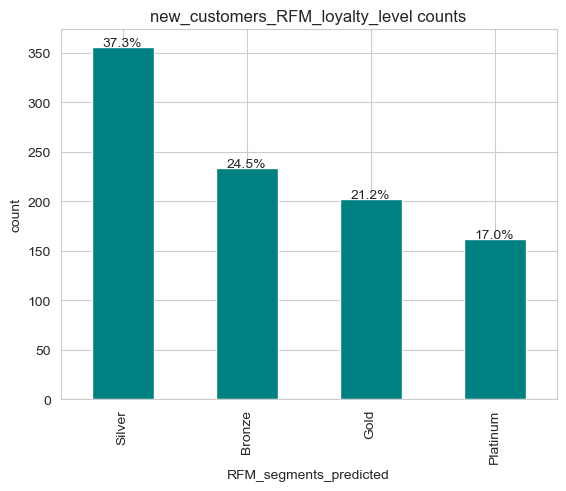

In [40]:
# count the occurrences of RFM_loyalty_level
import matplotlib.pyplot as plt

counts = new_customers['RFM_segments_predicted'].value_counts()
counts.plot(kind='bar',color='teal')
plt.title('new_customers_RFM_loyalty_level counts')
plt.xlabel('RFM_segments_predicted')
plt.ylabel('count')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that the majority of the customer base, roughly 63%, consists of silver and bronze customers, while gold and platinum customers make up approximately 37% of the total customer base.

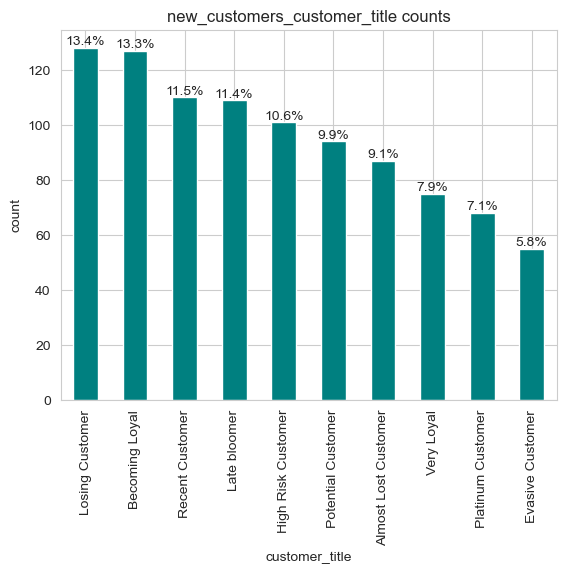

In [41]:
# count the occurrences of customer_rank
counts = new_customers['customer_title'].value_counts()
counts.plot(kind='bar',color='teal')
plt.title('new_customers_customer_title counts')
plt.xlabel('customer_title')
plt.ylabel('count')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that that the poorly performing customer segments, including high risk, losing, almost lost, and evasive customers, account for roughly 38% of the customer base. On the other hand, the remaining 62% is made up of customer segments such as late bloomers, potential customers, recent customers, becoming loyal customers, very loyal customers, and platinum customers. This segregation is especially useful for determining which ones are at risk of leaving, and which ones we should focus on for retention efforts.

In [42]:
# count the occurrences of RFM_segments_predicted
new_customers['RFM_segments_predicted'].value_counts()

Silver      356
Bronze      234
Gold        202
Platinum    162
Name: RFM_segments_predicted, dtype: int64

In [43]:
# selecting customers with Platinum loyalty level 
platinum_customers = new_customers[new_customers['RFM_segments_predicted'] == 'Platinum']
platinum_customers

first_name  last_name  gender  past_3_years_bike_related_purchases  \
1        Morly     Genery    Male                                   69   
2      Ardelis  Forrester  Female                                   10   
5        Druci    Brandli  Female                                   39   
6     Rutledge      Hallt    Male                                   23   
15    Marcelia  Monkleigh  Female                                   61   
..         ...        ...     ...                                  ...   
929    Aundrea   Outridge  Female                                   77   
930       Amby     Bodega    Male                                   63   
943     Kellen   Pawelski  Female                                   83   
949  Ferdinand  Romanetti    Male                                   60   
953      Sylas    Duffill    Male                                   56   

            DOB                job_title job_industry_category  \
1    1970-03-22      Structural Engineer              Property   
2    1974-08-28   Senior Cost Accountant    Financial Services   
5    1951-04-29  Assistant Media Planner         Entertainment   
6    1976-10-06     Compensation Analyst    Financial Services   
15   1993-08-22      Associate Professor         Manufacturing   
..          ...                      ...                   ...   
929  2001-01-24      Structural Engineer    Financial Services   
930  1968-06-12                Recruiter    Financial Services   
943  1945-07-26      Associate Professor         Manufacturing   
949  1959-10-07                Paralegal    Financial Services   
953  1955-10-02      Staff Accountant IV              Property   

        wealth_segment deceased_indicator owns_car  ...  Rank     Value  age  \
1        Mass Customer                  N       No  ...     1  1.718750   53   
2    Affluent Customer                  N       No  ...     1  1.718750   48   
5       High Net Worth                  N      Yes  ...     6  1.671875   71   
6        Mass Customer                  N       No  ...     6  1.671875   46   
15       Mass Customer                  N      Yes  ...    17  1.546875   29   
..                 ...                ...      ...  ...   ...       ...  ...   
929  Affluent Customer                  N      Yes  ...   974  0.425000   22   
930  Affluent Customer                  N      Yes  ...   974  0.425000   54   
943     High Net Worth                  N      Yes  ...   988  0.399500   77   
949  Affluent Customer                  N       No  ...   996  0.374000   63   
953      Mass Customer                  N      Yes  ...  1000  0.340000   67   

    age_group wealth_segment_binary  RFM_segments_predicted  RFM_score  \
1       51-70                     2                Platinum          9   
2       31-50                     0                Platinum         11   
5       71-92                     1                Platinum          7   
6       31-50                     2                Platinum          5   
15      20-30                     2                Platinum          8   
..        ...                   ...                     ...        ...   
929     20-30                     0                Platinum          7   
930     51-70                     0                Platinum          6   
943     71-92                     1                Platinum          6   
949     51-70                     0                Platinum          6   
953     51-70                     2                Platinum         10   

         customer_title                         customer_title_description  \
1       Recent Customer  Bought recently, not very often, average money...   
2            Very Loyal  Most recent, buys often, spends large amount o...   
5          Late bloomer  No purchases recently, but RFM value is larger...   
6    High Risk Customer  Purchase was long time ago, frequency is quite...   
15   Potential Customer  Bought recently, never bought before, spent sm...   
..  

In [44]:
# selecting customers with gold loyalty level 
gold_customers = new_customers[new_customers['RFM_segments_predicted'] == 'Gold']
gold_customers

first_name last_name  gender  past_3_years_bike_related_purchases  \
4      Melinda    Hadlee  Female                                   34   
7       Nancie      Vian  Female                                   74   
9      Barthel    Docket    Male                                   72   
10    Rockwell    Matson    Male                                   94   
12       Melba  Spellacy  Female                                   38   
..         ...       ...     ...                                  ...   
932    Beverly   Domnick  Female                                   56   
938    Augusta     Munns  Female                                    5   
941      Lolly    Prewer  Female                                   44   
942       Vyky      Pegg  Female                                   64   
944   Jermaine  Bagshawe  Female                                   60   

            DOB                     job_title job_industry_category  \
4    1965-09-21             Financial Analyst    Financial Services   
7    1972-12-27  Human Resources Assistant II                Retail   
9    1985-08-02       Accounting Assistant IV                    IT   
10   1995-01-01          Programmer Analyst I                Retail   
12   1976-12-09                  VP Marketing                Health   
..          ...                           ...                   ...   
932  1938-12-10  Structural Analysis Engineer                    IT   
938  1951-09-17    Quality Control Specialist    Financial Services   
941  1997-10-23                   Geologist I                Health   
942  1943-03-15    Quality Control Specialist         Manufacturing   
944  1954-05-14            Help Desk Operator              Property   

        wealth_segment deceased_indicator owns_car  ...  Rank     Value  age  \
4    Affluent Customer                  N       No  ...     4  1.703125   57   
7        Mass Customer                  N      Yes  ...     8  1.656250   50   
9        Mass Customer                  N      Yes  ...    10  1.640625   37   
10      High Net Worth                  N       No  ...    10  1.640625   28   
12       Mass Customer                  N       No  ...    14  1.593750   46   
..                 ...                ...      ...  ...   ...       ...  ...   
932      Mass Customer                  N       No  ...   977  0.420000   84   
938      Mass Customer                  N       No  ...   983  0.410000   71   
941      Mass Customer                  N       No  ...   988  0.399500   25   
942      Mass Customer                  N      Yes  ...   988  0.399500   80   
944      Mass Customer                  N      Yes  ...   988  0.399500   68   

    age_group wealth_segment_binary  RFM_segments_predicted  RFM_score  \
4       51-70                     0                    Gold          9   
7       31-50                     2                    Gold          6   
9       31-50                     2                    Gold          4   
10      20-30                     1                    Gold          3   
12      31-50                     2                    Gold          7   
..        ...                   ...                     ...        ...   
932     71-92                     2                    Gold         10   
938     71-92                     2                    Gold          8   
941     20-30                     2                    Gold          3   
942     71-92                     2                    Gold         10   
944     51-70                     2                    Gold          6   

           customer_title                         customer_title_description  \
4         Recent Customer  Bought recently, not very often, average money...   
7         Losing Customer  Purchases was a while ago, below average RFM v...   
9    Almost Lost Customer  Very low recency, low frequency, but high amou...   
10       Evasive Customer  Very low recency, Very low frequency, small am...   
12           Late bloome

In [45]:
# exporting our new_customers dataframe 
new_customers.to_csv('most_valued_customers.csv')

----------------------------------------------------------------------------------------------------------------------

Cheers,    
Vamsi Krishna Kamatham